In [1]:
import numpy as np
import matplotlib.pyplot as plt
from importlib import reload

from brian2 import *

from my_code.aux_functions import *
from my_code.parameters import *
from my_code.network import *
from my_code.tests import *
from my_code.MyPlots import *
import my_code.MyPlots as Mplt

In [2]:
# THE CURRENT THRESHOLD
(-60*mV+50*mV)*10*nS

-100. * pamp

In [3]:
# POTENTIAL THRESHOLD
100*pA/(10*nS)-60*mV

-50. * mvolt

In [60]:
stimulation = 'none'
net_params = get_default_net_params()
test_params = get_dft_test_params()

net_params['g_leak_p'].set_param(10) # added here
net_params['tau_l'].set_param(1) # added here

net_params['prob_pp'].set_param(0.1)

net_params['g_pp'].set_param(0.01)
net_params['g_bp'].set_param(0.05)
net_params['g_pb'].set_param(2)
net_params['g_bb'].set_param(0.01)

net_params['tau_d_p'].set_param(2)
net_params['tau_d_b'].set_param(1.5)

net_params['J_spi_p'].set_param(20)
net_params['tau_adapt_p'].set_param(250) # added here

net_params['J_spi_b'].set_param(20)
net_params['tau_adapt_b'].set_param(250) # added here

net_params['curr_bg_p'].set_param(101)
net_params['curr_bg_b'].set_param(101)

test_params['sim_time'].set_param(4)
test_params['stim_strength'].set_param(0)
test_params['min_peak_height'].set_param(30)
# test_params['mean_peak_distant'].set_param(0)



# Set Model and Monitors

In [61]:
built_network, used_net_params = build_network(net_params,initial_condition='none')
built_network, test_params = record_network(built_network, used_net_params, test_params)
built_network, test_params = record_p_currents(built_network, used_net_params, test_params)
built_network, test_params = record_b_currents(built_network, used_net_params, test_params)

BP Model with Adaptation
Neuron type: adaptive leaky integrate-and-fire
Total number of synapses


P->P: 6,718,333
B->P: 553,659
P->B: 221,323
B->B: 3,695


In [62]:
built_network['pop_p'].curr_adapt = 0*pA
built_network['pop_p'].v = -60*mV
built_network['pop_b'].v = -60*mV
sim_dt = test_params['sim_dt'].get_param()
defaultclock.dt = sim_dt

# Run the model and get Monitos

In [63]:
tested_network, test_params = run_test(built_network, test_params, used_net_params, stimulation = stimulation)
ready_monitors, test_data, test_params = prepare_test(tested_network, test_params, used_net_params)
ready_monitors = average_p_currents(tested_network, ready_monitors)
ready_monitors = average_b_currents(tested_network, ready_monitors)

Starting simulation at t=0. s for a duration of 2. s
2. s (100%) simulated in 4s
Starting simulation at t=2. s for a duration of 4. s
4. s (100%) simulated in 9s


In [64]:
start = 0
end = np.max(built_network['rtm_p'].t / second+1) * second
y_axis_limit=None
x_axis_limit = [3,5]
x_axis_limit = [start,end]

# Currents

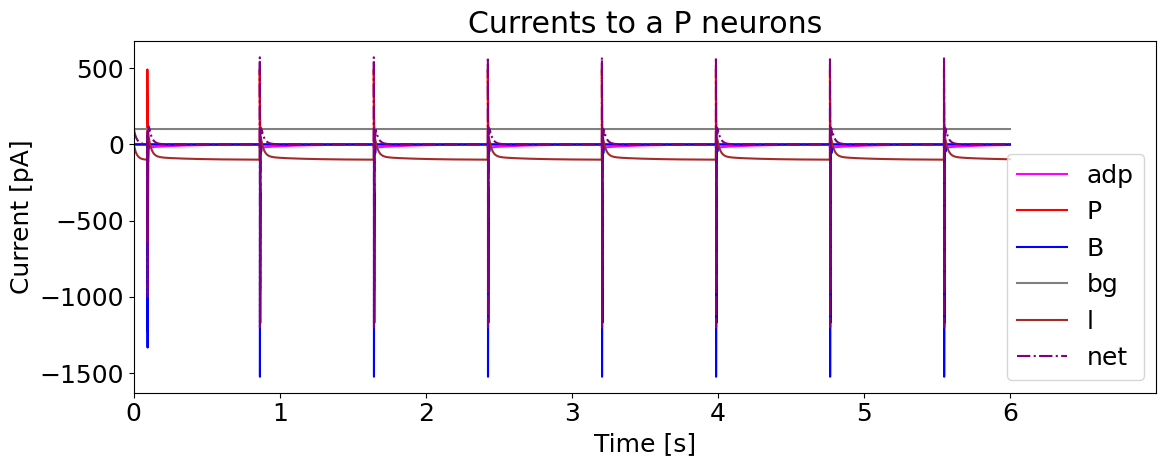

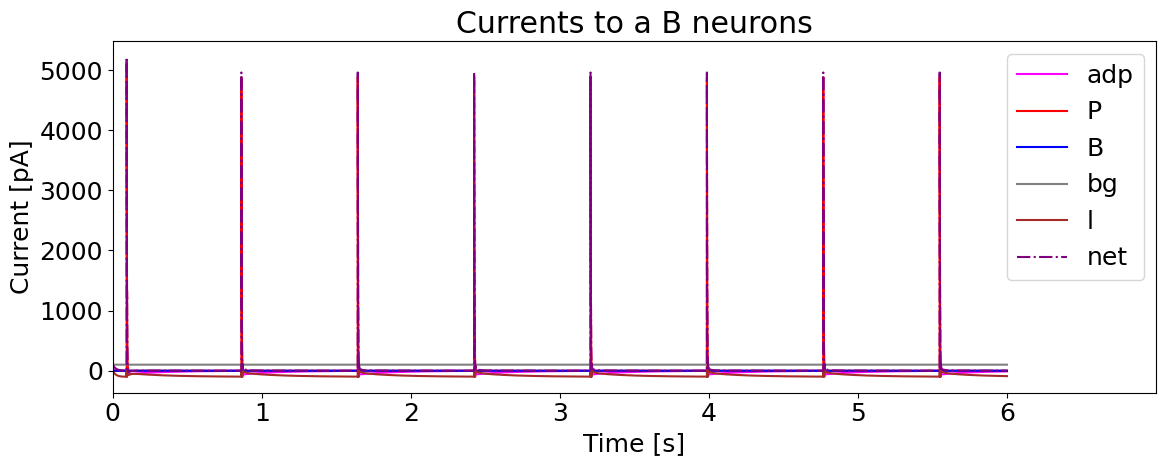

In [65]:
reload(Mplt)
Mplt.plot_currents_P_neurons(built_network, x_axis_limit)
Mplt.plot_currents_B_neurons(built_network, x_axis_limit,)

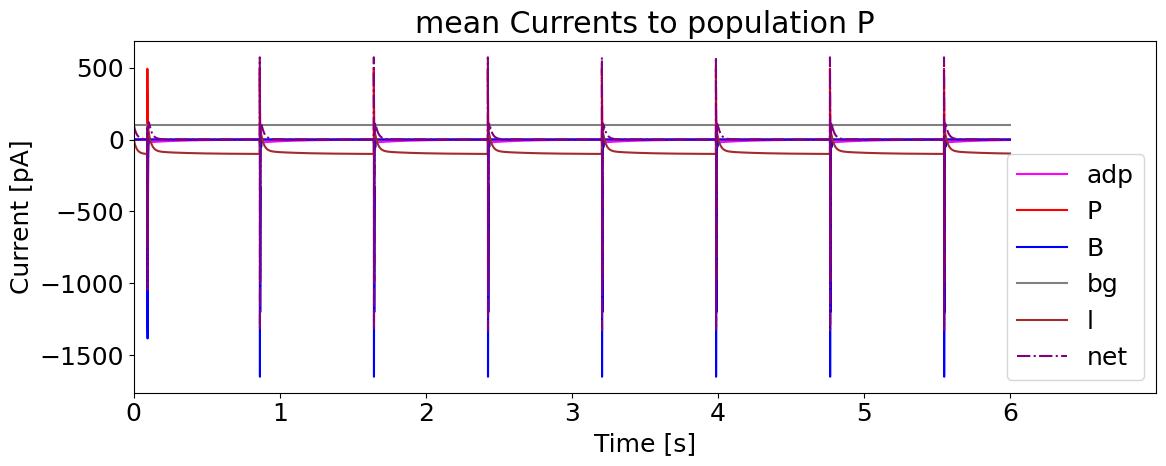

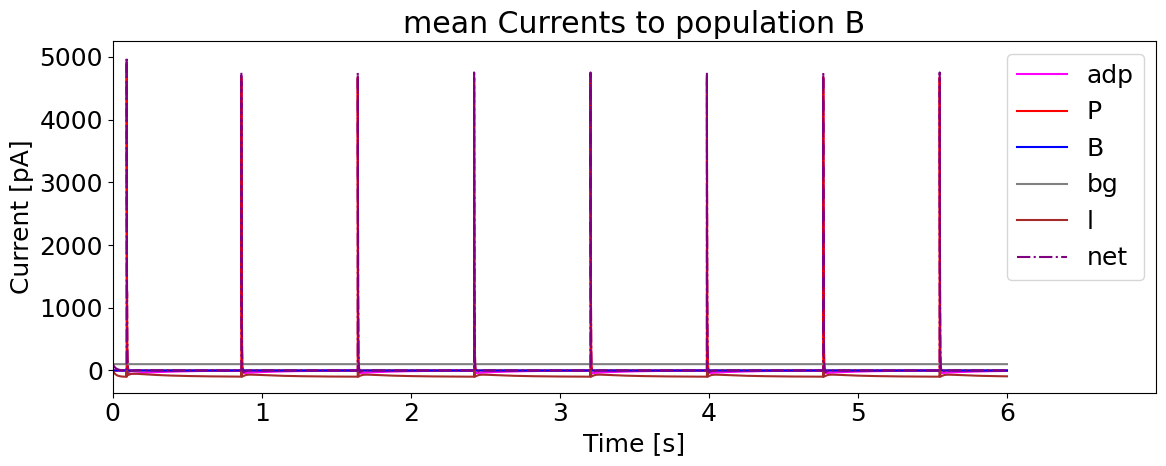

In [66]:
reload(Mplt)
Mplt.plot_current_P_pop(ready_monitors, x_axis_limit)
Mplt.plot_current_B_pop(ready_monitors, x_axis_limit)

# Firing rates

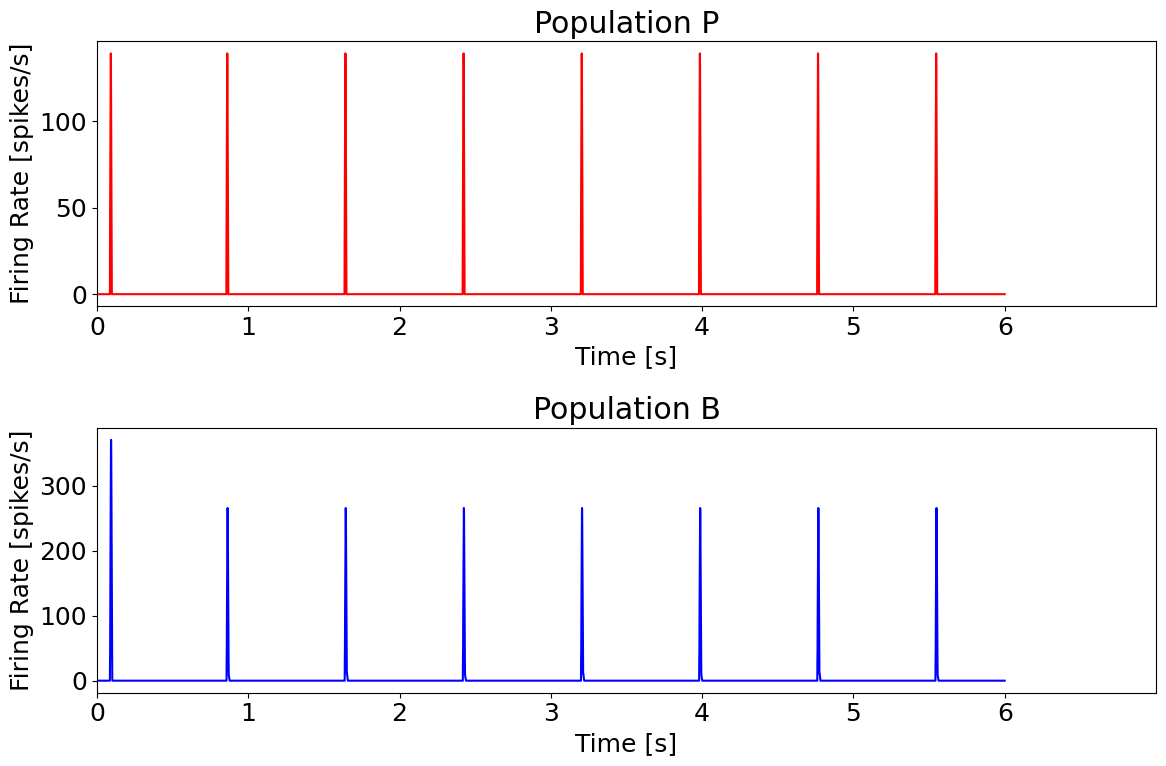

In [67]:
reload(Mplt)
Mplt.plot_population_fr(ready_monitors,x_axis_limit)

In [68]:
print('P firing overall:',"%.2f" % np.mean(test_data['mean_rate_p']),'spikes/s')
print('B firing overall:',"%.2f" % np.mean(test_data['mean_rate_b']),'spikes/s')

P firing overall: 1.25 spikes/s
B firing overall: 2.59 spikes/s


# Membrane Potential

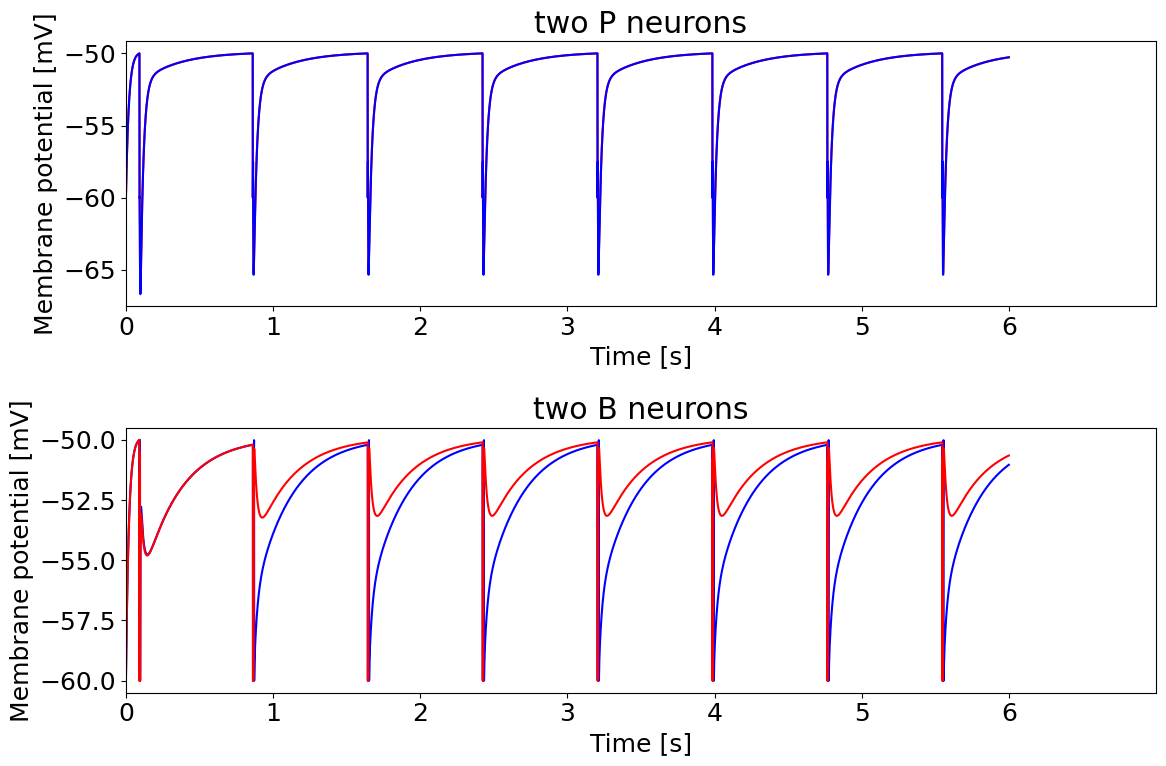

In [69]:
reload(Mplt)
Mplt.plot_mpt_neuron(built_network,x_axis_limit)

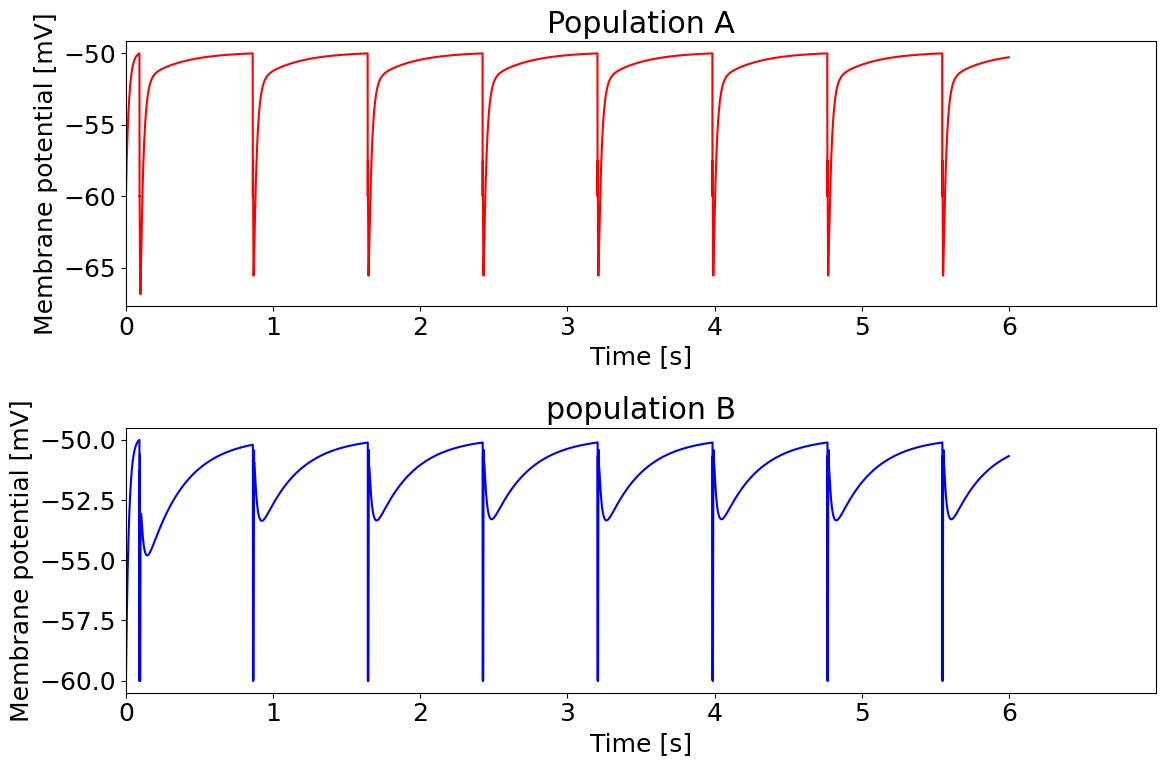

In [70]:
reload(Mplt)
Mplt.plot_mpt_pop(ready_monitors,x_axis_limit)

# LFP

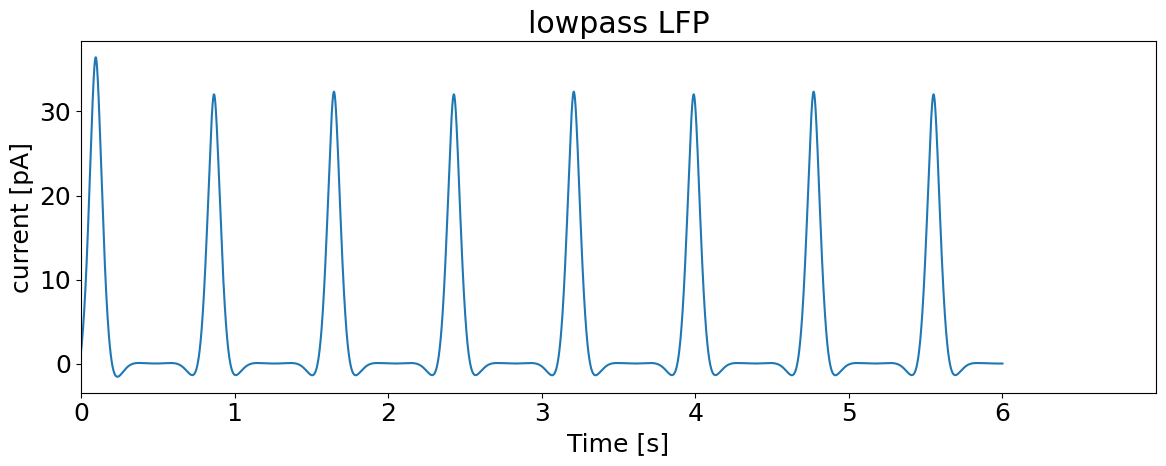

In [71]:
reload(Mplt)
Mplt.plot_lowpass_LFP(ready_monitors,x_axis_limit)

In [72]:
print('number of events:',test_data['n_events'])

number of events: 4


In [73]:
print('Event duration:',"%.1f" % np.mean(test_data['event_durations']),'ms')
print('P firing overall:',"%.2f" % np.mean(test_data['mean_rate_p']),'spikes/s')
print('B firing overall:',"%.2f" % np.mean(test_data['mean_rate_b']),'spikes/s')
print('P firing non-states:',"%.2f" % np.mean(test_data['rtm_p_nswr']),'spikes/s')
print('B firing non-states:',"%.2f" % np.mean(test_data['rtm_b_nswr']),'spikes/s')
print('P firing event:',"%.2f" % np.mean(test_data['rtm_p_event']),'spikes/s')
print('B firing event:',"%.2f" % np.mean(test_data['rtm_b_event']),'spikes/s')
print('Peak time B:',"%.1f" % np.mean(0.1*test_data['rtm_b_event_argmax']),'ms')
print('Peak time P:',"%.1f" % np.mean(0.1*test_data['rtm_p_event_argmax']),'ms')

Event duration: 93.5 ms
P firing overall: 1.25 spikes/s
B firing overall: 2.59 spikes/s
P firing non-states: 0.00 spikes/s
B firing non-states: 0.00 spikes/s
P firing event: 10.68 spikes/s
B firing event: 22.12 spikes/s
Peak time B: 44.5 ms
Peak time P: 42.5 ms
